<a href="https://colab.research.google.com/github/nurkomarhidaya/Machine-Learning-TensorFlow/blob/main/Multivariate_Calculus_3_Jawaban.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lagrange Multiplier for Optimizing Marketing Budget Spent

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


Lagrange Multiplier on a function with 2 variables with 1 equality constraint

In this notebook, I show how to use the Lagrange Multiplier in a relatively simple case.

The case study:
- Suppose we have a fixed budget for speding on marketing of 2500 dollar
- Suppose we can choose to invest in two types of campaigns: Social Media and TV, where you have to decide
- To simplify, let's say that one campaign on social media costs 25 dollar and one campaign on TV costs 250 dollar.
- Suppose we have experimented a lot in the past and that we have been able to define the Revenues as a function of the two types of media investments.

In this notebook, I will show how to find the maximum revenue and the number of different types of campaigns you should buy using Lagrange Multiplier.



In [ ]:
#Inspecting the cost
cost_social = 25
cost_tv = 250
budget = 2500

The equation for costs:
25 dollars times the number of social campains + 250 times the number of tv campaigns
Since we want to spent exactly the budget we know that this is equal to 2500 dollar.

Otherwise, the constraint for our revenue optimization is: 25 social + 250 tv = 2500

In [ ]:
#lets get the minimum and maximum number of campaigns:
social_min = 0
social_max = budget / cost_social

tv_min = 0
tv_max = budget / cost_tv


In [ ]:
# if we fix the number of tv campaings, we know the number of social campaigns left to buy by inverting the formula
def n_social(n_tv, budget):
    return (budget - 250 * n_tv - 100) / 25 

In [ ]:
# if we fix the number of social campaings, we know the number of tv campaigns left to buy by inverting the formula
def n_tv(n_social, budget):
    return (budget - 25 * n_social - 100 ) / 250

**Plotting the possible ways of spending the budget on a graph**

Every combination of hours and materials that is under the line is inside the budget.
Every combination of hours and materials that is above the line is outside the budget.
If we want to spend the whole budget (we generally do), we have to be exactly on the line.

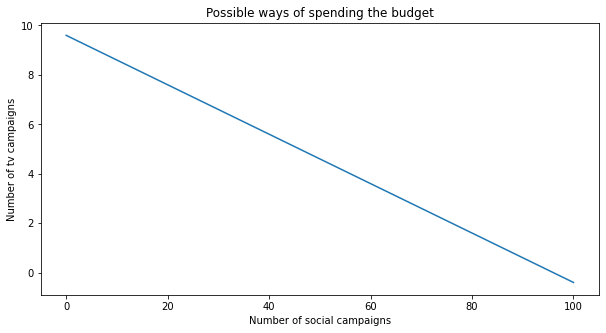

In [ ]:
social_x = np.linspace(social_min, social_max, 100)
tv_y = n_tv(social_x, budget)

plt.figure(figsize=(10,5))
plt.plot(social_x, tv_y)
plt.xlabel('Number of social campaigns')
plt.ylabel('Number of tv campaigns')
plt.title('Possible ways of spending the budget')
plt.show()


**Inspecting the revenues**

Suppose that through eperimentation and analysis, somebody has been able to identify the revenue curve for your business and that it is defined as:

Revenue = 7 times the number of social campaigns to the power 3/4 times the number of tv campaigns to the power 1/4.

This can be presented in a Python function as follows:


In [ ]:
def revenues(social, tv):
    return social**(3/4) * tv**(1/4) * 7


**The 3D representation of the problem**

In our exercise, we have three variables: the revenue, the number of social campaigns and the number of tv campaigns on materials.
Of course, we want to maximize revenues.

We also have a budget constraint which is the 2D line shown above: the maximum amount that we can spent.
The goal is to find the maximum revenue as long as it is under the budget.


I will first show a 3D representation of the problem in which we see:

- the revenue in 3D as a function of social campaigns and tv campaigns.
- the constraint line presented in 2D below the revenue graph.


The goal is to idenify the highest point on the 3D curve that is exactly on the constraint line.


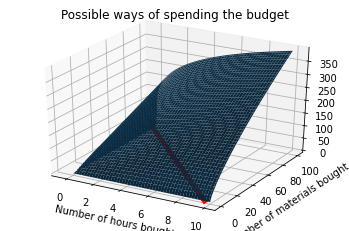

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
social_axis = np.linspace(social_min, social_max, 100)
tv_axis = np.linspace(tv_min, tv_max, 100)
social_grid, tv_grid = np.meshgrid(social_axis, tv_axis)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(tv_grid, social_grid, revenues(social_grid, tv_grid))

ax.plot(tv_y, social_x, linewidth = 5, color = 'r')

ax.set_xlabel('Number of hours bought')
ax.set_ylabel('Number of materials bought')
ax.set_title('Possible ways of spending the budget')
plt.show()


**The 2D representation of the problem**

The 3D is cool to look at, but relatively hard to read. Therefore, I made two 2D graphs that show exactly the same information: instead of adding the revenues on a Z axis, the revenues are now represented as a color gradient (left) and as a contour gradient (right).

The goal stays the same: finding the highest revenue as long as it's below the budget constraint line.


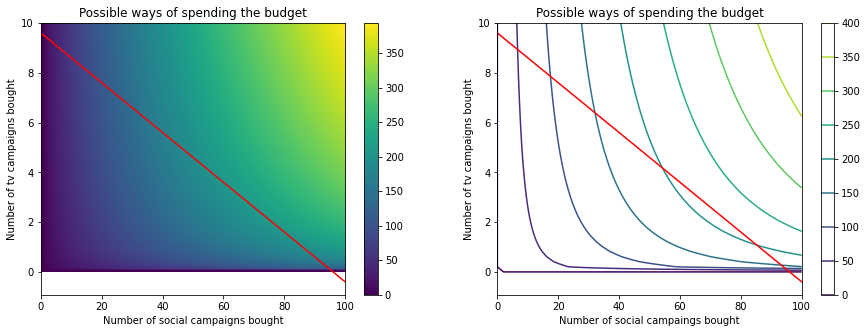

In [ ]:
fig, (ax_l, ax_r) = plt.subplots(1, 2, figsize = (15, 5))


social_axis = np.linspace(social_min, social_max, 100)
tv_axis = np.linspace(tv_max, tv_min, 100)
social_grid, tv_grid = np.meshgrid(social_axis, tv_axis)
    
im = ax_l.imshow(revenues(social_grid, tv_grid), aspect = 'auto', extent=[social_min, social_max, tv_min, tv_max])
ax_l.plot(social_axis, n_tv(social_axis, 2500), 'r')
ax_l.set_xlabel('Number of social campaigns bought')
ax_l.set_ylabel('Number of tv campaigns bought')
ax_l.set_title('Possible ways of spending the budget')


# The contours are showing how the intersection looks like

social_axis = np.linspace(social_min, social_max)
tv_axis = np.linspace(tv_min, tv_max)
social_grid, tv_grid = np.meshgrid(social_axis, tv_axis)

im2 = ax_r.contour(revenues(social_grid,tv_grid), extent=[social_min, social_max, tv_min, tv_max])
ax_r.plot(social_axis, n_tv(social_axis, 2500), 'r')
ax_r.set_xlabel('Number of social campaings bought')
ax_r.set_ylabel('Number of tv campaigns bought')
ax_r.set_title('Possible ways of spending the budget')

plt.colorbar(im,ax=ax_l)
plt.colorbar(im2,ax=ax_r)

plt.show()


**Visual solution**

If we check the graph (wheter in gradient or in contour), we can read that on the red line (max budget), the highest revenue value would be roughly around 3 tv campaigns and 70 social campaigns.

It is great to have this first visual estimate, now let's find the exact value with mathematics.
Mathematical solution
Where is the maximum?

We need to find the point where the revenue contour is tangent to the constraint line.
The method we use for this is Lagrange Multiplier.

In short it works as follows:
We can find the maximum at the point where the gradient of the Revenue contour is proportional to the gradient of the constraint line.
You can check back to the contour graph to see that this is true.

**How to represent proportionality?**

So we need to solve a proportionality rather than an equality.
So not: "gradient of revenues" = "gradient of constraint"
But: "gradient of revenues" is proportional to "gradient of constraint"
We do this mathematically by stating
"gradient of revenues" = lambda times "gradient of constraint"

This labda makes it a statement of proportionality.
This lambda is called the Lagrange Multiplier.
Gradients are derivatives

One tricky step now before using the inbuilt python optimizer is to get the gradients by getting the Derivatives of the Revenue function and of the constraint function. Since there are two variables in each, we need two partial derivates to get a vector of those two derivatives.


In [ ]:
from sympy import *

s, t, l = symbols('s t l')

solve([Eq((21/4)*((t**(1/4))/s**(1/4)) - 25*l, 0),
   Eq((7/4)*(s**(3/4)/t**(3/4)) - 250*l, 0),
   Eq(25*s+250*t - 2500, 0)], [s,t,l], simplify=False)

[(75.0000000000000, 2.50000000000000, 0.0897302713432092)]


**Conclusion:**

Having:
- a budget of 2500
- a hourly cost of 25
- a material unit cost of 250
- a specified revenue function

Using the Linear Solver, we have identified the maximum of Revenue will be obtained at 75 social campaigns and 2.5 tv campaigns. The total revenue would be:


In [ ]:
revenues(75, 2.5)

224.3256783580229

#

#Non linear

Nonlinear Least Squares (NLS) is an optimization technique that can be used to build regression models for data sets that contain nonlinear features. Models for such data sets are nonlinear in their coefficients.

PART 1: The concepts and theory underlying the NLS regression model. This section has some math in it. You will enjoy it if you like math and/or are curious about how Nonlinear Least Squares Regression works.

PART 2: Tutorial on how to build and train an NLS regression model using Python and SciPy. You do not need to read PART 1 to understand PART 2.


##PART 1: The theory behind NLS regression

We’ll follow these representational conventions:

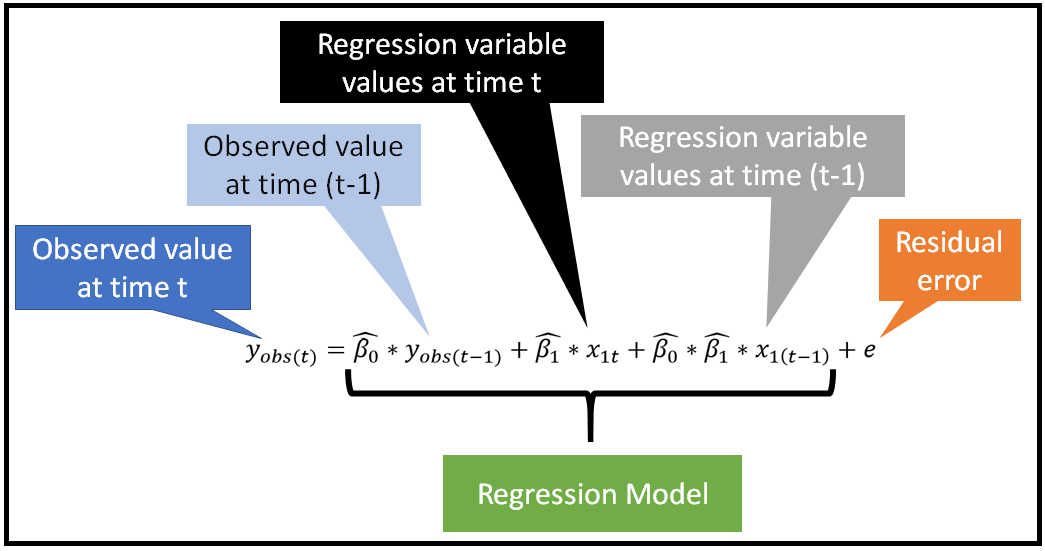



##PART 2: Tutorial on NLS Regression using Python and SciPy

Let’s use the Nonlinear Least Squares technique to fit a Poisson regression model to a data set of daily usage of rental bicycles spanning two years.

The first 10 rows of the data set are as below:

In [ ]:
from scipy.optimize import least_squares
import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.stattools as st
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('https://gist.githubusercontent.com/sachinsdate/413910079ab4ef4332e7a97cae55d13a/raw/8b7bfd6584ddfdedfb526cf377cee2278fb36bd0/bike_sharing_dataset_daywise.csv', header=0, parse_dates=['dteday'], infer_datetime_format=True)

In [ ]:
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual_user_count,registered_user_count,total_user_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-02-01,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-03-01,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-04-01,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-05-01,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-06-01,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-07-01,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-08-01,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-09-01,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-10-01,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


The NLS regression model

We’ll build a regression model in which the dependent variable (y) is:

total_user_count: count of total bicycle renters

The regression variables matrix X will contain the following explanatory variables:

    season: the prevailing weather season
    yr: the prevailing year: 0=2011, 1=2012
    mnth: the prevailing month: 1 thru 12
    holiday: Whether the measurement was taken on a holiday (yes=1, no=0)
    weekday: day of the week (0 thru 6)
    workingday: Whether the measurement was taken on a working day (yes=1, no=0)
    weathersit: The weather situation on the day: 
    1=Clear, Few clouds, Partly cloudy, Partly cloudy. 
    2=Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist. 
    3=Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds. 
    4=Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog.
    temp: Temperature, normalized to 39C
    atemp: Real feel, normalized to 50C
    hum: Humidity, normalized to 100
    windspeed: Wind speed, normalized to 67


In [ ]:
mask = np.random.rand(len(df)) < 0.9
df_train = df[mask]
df_test = df[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

Training data set length=663
Testing data set length=68


In [ ]:
#Create the regression expression in Patsy syntax. We are saying that total_user_count is the dependent variable and it depends on all the variables 
# mentioned on the right side of the tilde (~) symbol:
expr = """total_user_count ~ season + yr + mnth + holiday + weekday + workingday + weathersit + temp + atemp + hum + windspeed  """

In [ ]:
# Contoh 
#Setup the regression expression in patsy notation. We are telling patsy that BB_COUNT is our dependent variable and
# it depends on the regression variables
# expr = """BB_COUNT ~ DAY  + DAY_OF_WEEK + MONTH + HIGH_T + LOW_T + PRECIP"""

In [ ]:
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

In [ ]:
def calc_exponentiated_mean(beta, x):
    lin_combi = np.matmul(np.array(x), np.array(beta))
    mean = np.exp(lin_combi)
    return mean

In [ ]:
def calc_residual(beta, x, y_obs):
    y_pred = calc_exponentiated_mean(beta, x)
    r = np.subtract(y_pred, np.array(y_obs).flatten())
    return r

In [ ]:
num_params = len(X_train.columns)
beta_initial = np.ones(num_params)

In [ ]:
result_nls_lm = least_squares(fun=calc_residual, x0=beta_initial, args=(X_train, y_train), method='lm', verbose=1)

`ftol` termination condition is satisfied.
Function evaluations 327, initial cost 1.9708e+24, final cost 3.0487e+08, first-order optimality 7.05e+03.


In [ ]:
df_beta_cap = pd.DataFrame(data=result_nls_lm.x.reshape(1,num_params), columns=X_train.columns)
print(df_beta_cap)

   Intercept    season        yr      mnth   holiday   weekday  workingday  \
0    7.63082  0.103873  0.459477 -0.003538 -0.149081  0.015106     0.01667   

   weathersit      temp     atemp       hum  windspeed  
0   -0.136947 -0.824982  2.070917 -0.161811   -0.41566  


In [ ]:
predicted_counts=calc_exponentiated_mean(beta=result_nls_lm.x, x=X_test)

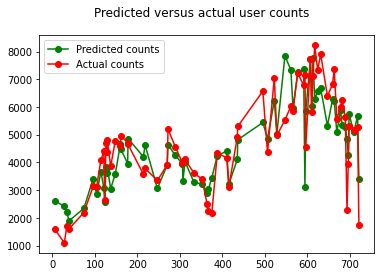

In [ ]:
actual_counts = y_test['total_user_count']
 
fig = plt.figure()
fig.suptitle('Predicted versus actual user counts')
 
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
 
plt.legend(handles=[predicted, actual])
plt.show()